# neurocatcher example notebook

## dataTrain example

### import necessary modules

In [7]:
from showit import image
import matplotlib.pyplot as plot
import numpy as np
from fakearray import calcium_imaging
from showit import image
%matplotlib inline

from neurocatcher import data_train

### get data and truth from fakearray and format for neurocatcher

In [8]:
data,series,truth=calcium_imaging(shape=(50,50), n=5, t=10, noise=0.0, withparams=True)

data=data*255/data.max()
data=np.transpose(data,(1,2,0))

### run dataTrain

In [10]:
batch_data,batch_truth=data_train([data],[truth],10,50,50,min_gray=0,max_gray=255,up_down=0,rotation=0,brighten=0,contrast=0)

### plot images

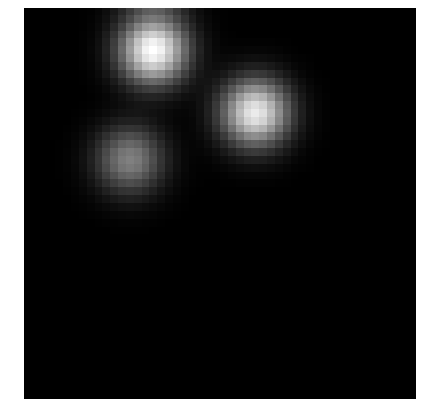

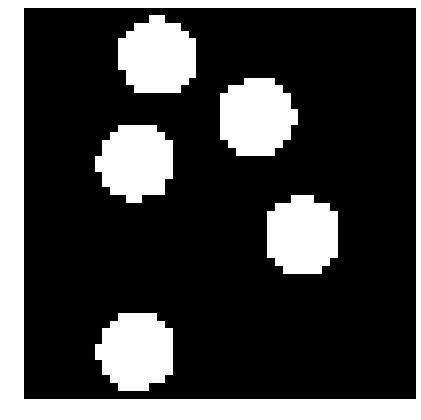

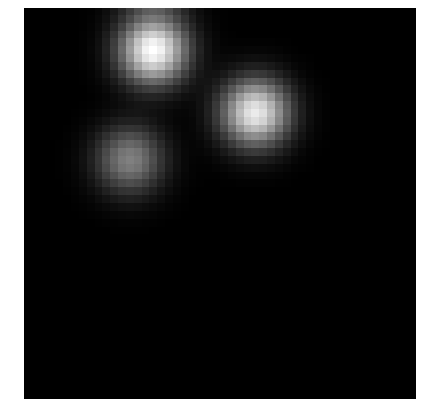

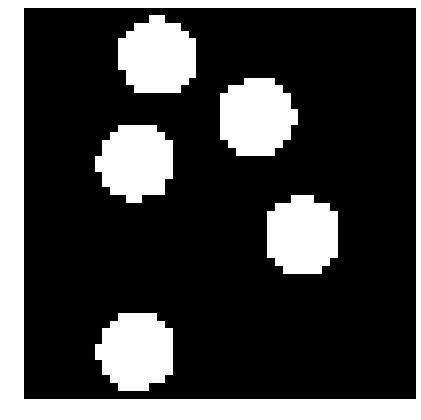

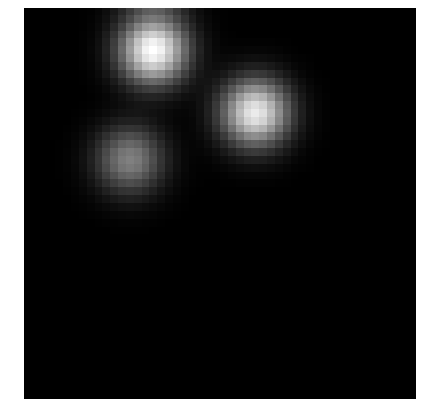

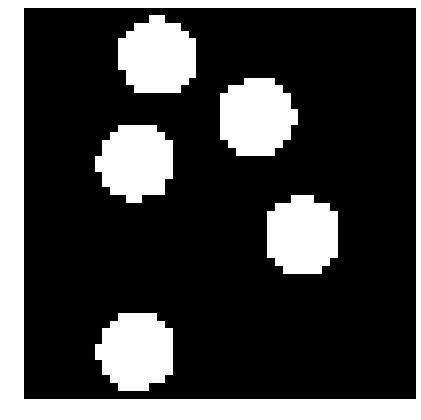

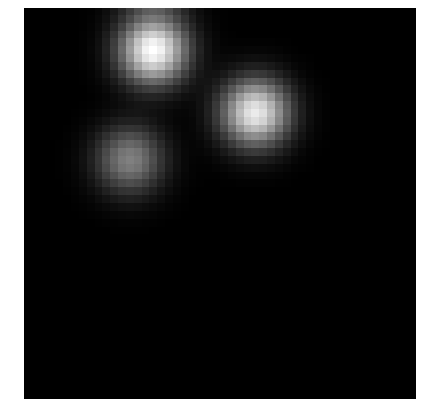

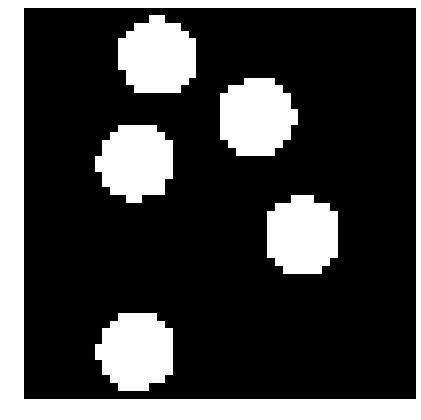

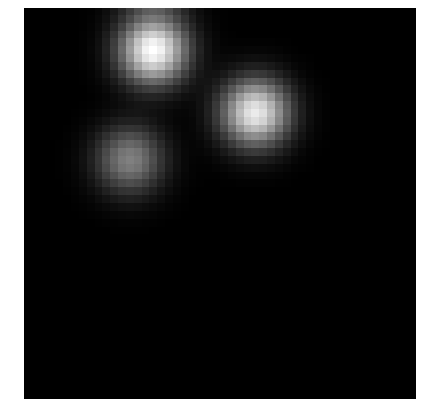

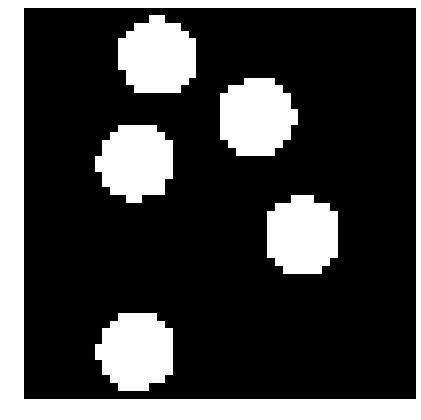

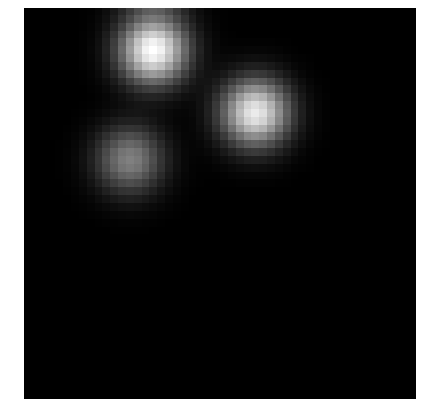

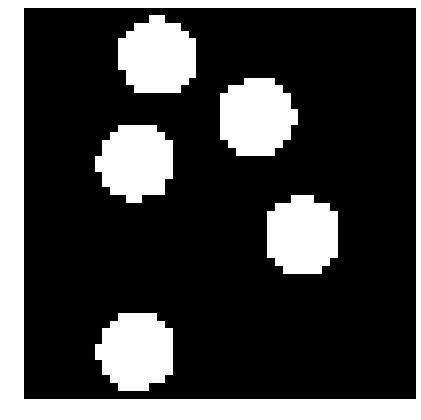

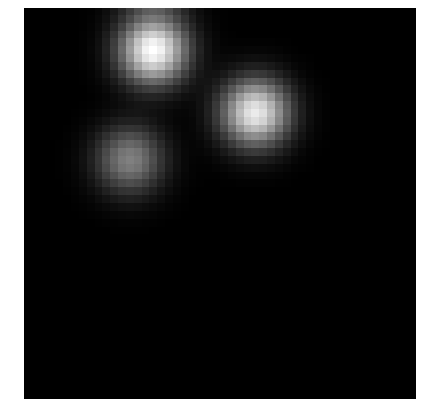

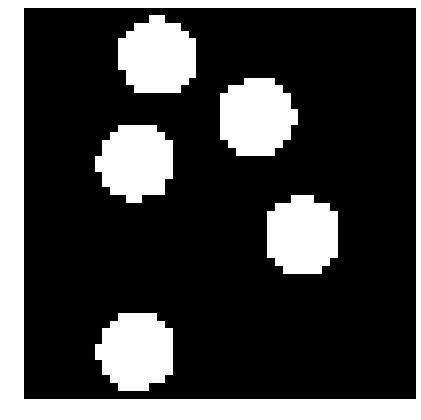

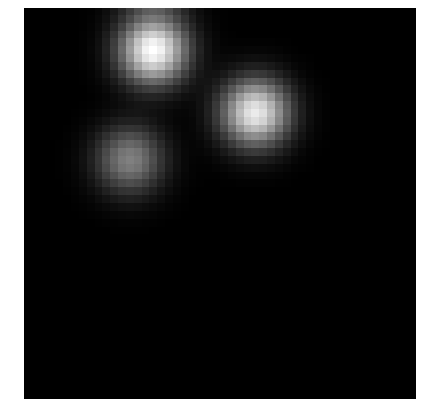

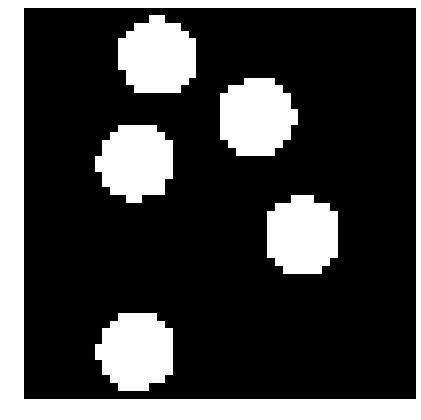

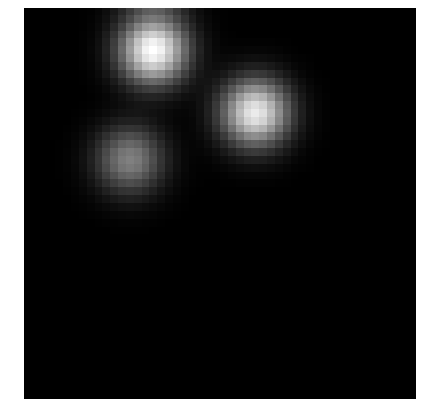

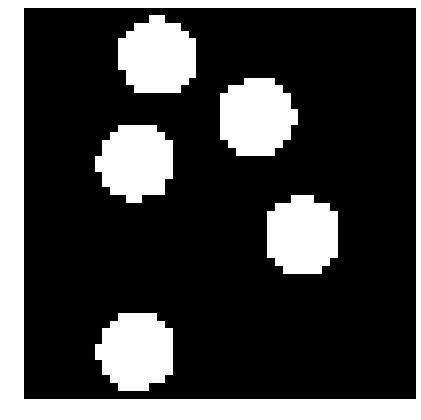

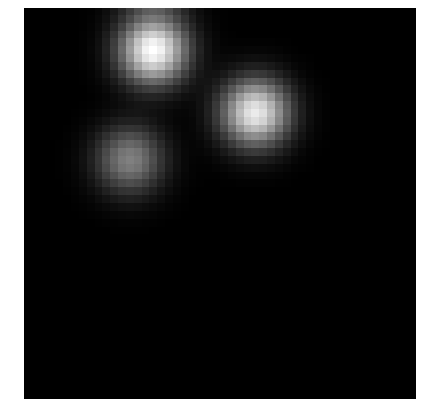

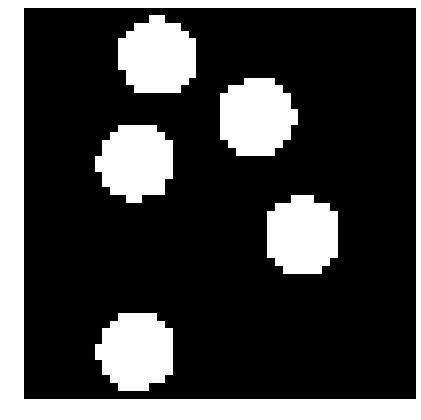

In [12]:
for i,pic in enumerate(batch_data):
    image(np.mean(pic,axis=2))
    image(batch_truth[i,:,:,0])


## Training a toy network on toy data

In [14]:
import neurocatcher as nc
import fakearray as fa

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


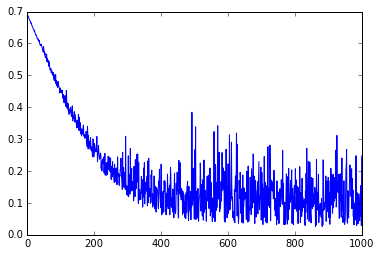

In [17]:
# generate some faux calcium imaging data
data, series, truth = fa.calcium_imaging(withparams=True)

# we will train a network that takes the mean image as input
data = [data.mean(axis=0)[..., np.newaxis]]
truth = [truth]

# each layer is defined by (filter footprint, 3 of features)
layers = [(3, 10), (3, 10)]

# the input will be a 15-by-15 patch with a single channel
inputShape = (15, 1)

# train network
acc, network = nc.network.train_conv_net(layers, inputShape, data, truth, batch_size=30, steps=1000)

# show how the loss changes during training
plt.plot(acc[:, 0])

1/1 [==============================] - 0s


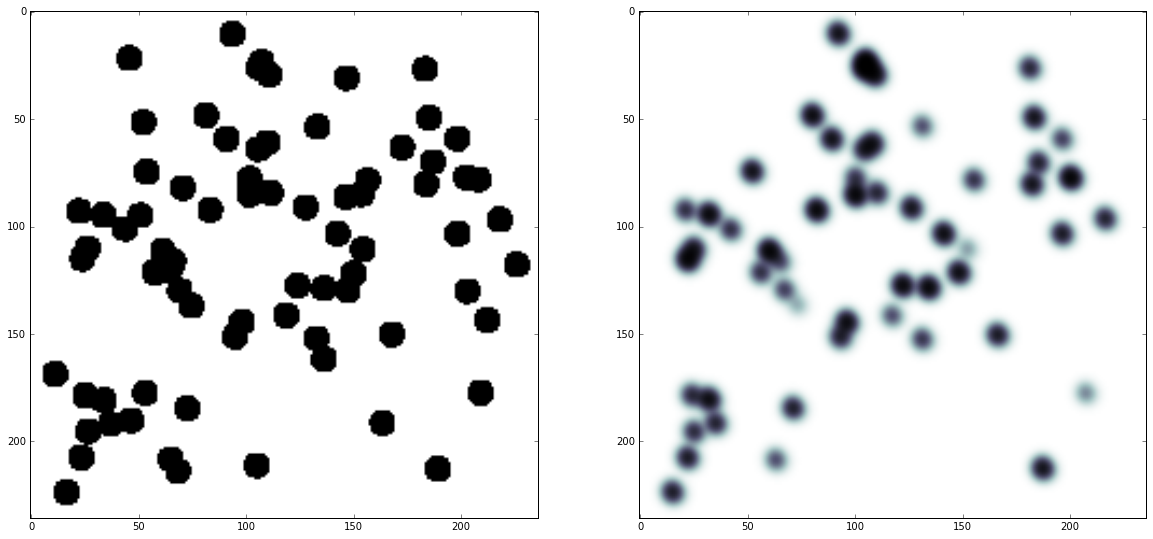

In [19]:
data,series,truth=calcium_imaging(shape=(240,240), n=75, t=10, noise=0.0, withparams=True)
data = [data.mean(axis=0)[..., np.newaxis]]
truth = [truth]

# get a prediction from the full data set
yhat, ytarget = nc.network.predict_conv_net(network, data, truth)

# visualize the results
plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
plt.imshow(ytarget[0], cmap='bone')

plt.subplot(1, 2, 2)
plt.imshow(yhat[0], cmap='bone')